   # CRAIGLIST VEHICLE TIME SERIES ANALYSIS

**Introduction:**

In this analysis, I will delve into the dynamic world of time series data to gain insights into the temporal patterns and trends associated with a dataset capturing the lifecycle of listed cars. 

**Background:**

Understanding the temporal dynamics of car listings can be instrumental for various stakeholders, including sellers, buyers, and market analysts. The time a car spends on the market, from its initial posting to its eventual removal, not only reflects market demand but also provides key indicators of the effectiveness of pricing strategies, marketing efforts, and overall market conditions.

**Objective:**

Our main goal is to analyze the time series nature of the data, focusing on the duration of car listings. To achieve this, I will calculate the number of days each car is listed before removal, allowing us to identify any underlying patterns, seasonality, or trends. By visualizing and interpreting these temporal aspects, I will aim to uncover valuable information that can aid in optimizing the process of listing and selling cars.

**Methodology:**

I will utilize time series analysis techniques, including the calculation of the time duration between the posting and removal dates for each car. Subsequently, I will employ data visualization tools, such as line plots and bar graphs, to illustrate the temporal evolution of key metrics. Through these methods, I aim to present a comprehensive overview of how the duration of car listings has changed over the years.

**Expected Insights:**

By the end of this analysis, I anticipate to uncover insights into the average duration a car remains listed, potential seasonality in market activity, and any notable shifts or trends over different years. These findings can offer practical implications for sellers, informing decisions related to pricing strategies, advertising efforts, and overall market positioning.

In summary, this work seeks to unravel the temporal dynamics within the car listing dataset, providing a foundation for further exploration and strategic decision-making within the automotive market.


## Import necessary libraries and load the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:

df = pd.read_csv("/craigslist_vehicles.csv")

## Extract the required columns

In [3]:
columns = ['region','price','year','manufacturer','model','condition','cylinders','fuel','odometer','transmission','drive','size','type','paint_color','posting_date','removal_date']
df = df[columns]

## Asses the extent of the missing data in each column. This information is useful for deciding how to handle missing values, whether it's through imputation, removal of rows or columns with missing values, or other strategies depending on the context of your analysis.

In [4]:
missing_values = df.isnull().sum()
total_values = df.size
percentage_missing = (missing_values / total_values) * 100
print(percentage_missing)

region          0.000000
price           0.000000
year            0.017643
manufacturer    0.258357
model           0.077261
condition       2.549077
cylinders       2.601404
fuel            0.044114
odometer        0.064421
transmission    0.037423
drive           1.911647
size            4.485467
type            1.359545
paint_color     1.906317
posting_date    0.000996
removal_date    0.000996
dtype: float64


## This set of operations is performing data preprocessing, aiming to handle missing values in a way that allows for further analysis without compromising the integrity of the dataset.

In [5]:
df['year'] = df['year'].interpolate()
df['manufacturer'] = df['manufacturer'].fillna(df['manufacturer'].mode()[0])
df['model'].ffill(inplace=True)
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])
df['fuel'] = df['fuel'].fillna(df['fuel'].mode()[0])
df['odometer'] = df['odometer'].fillna(df['odometer'].mean())
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['drive'] = df['drive'].fillna(df['drive'].mode()[0])
df['size'] = df['size'].fillna(df['size'].mode()[0])
df['type'] = df['type'].fillna(df['type'].mode()[0])
df['paint_color'] = df['paint_color'].fillna(df['paint_color'].mode()[0])
df['posting_date'] = df['posting_date'].fillna(df['posting_date'].mode()[0])
df['removal_date'] = df['removal_date'].fillna(df['removal_date'].mode()[0])

## Convert posting_date and removal_date to datetime

In [6]:
df['posting_date'] = pd.to_datetime(df['posting_date']).dt.date
df['removal_date'] = pd.to_datetime(df['removal_date']).dt.date

In [7]:
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
posting_date    0
removal_date    0
dtype: int64

## Dropping duplicate values in our dataset

In [8]:
df.drop_duplicates()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,posting_date,removal_date
0,abilene,4500,2002.0,bmw,x5,good,6 cylinders,gas,184000.0,automatic,4wd,full-size,sedan,white,2021-04-16,2021-05-02
1,abilene,4500,2002.0,bmw,x5,good,6 cylinders,gas,184000.0,automatic,4wd,full-size,sedan,white,2021-04-24,2021-04-28
2,abilene,4900,2006.0,toyota,camry,excellent,4 cylinders,gas,184930.0,automatic,fwd,full-size,sedan,silver,2021-04-23,2021-05-25
3,abilene,6500,2008.0,ford,expedition,good,6 cylinders,gas,206000.0,automatic,4wd,full-size,sedan,white,2021-04-16,2021-04-26
4,abilene,6500,2008.0,ford,expedition,good,6 cylinders,gas,206000.0,automatic,4wd,full-size,sedan,white,2021-04-24,2021-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,zanesville / cambridge,5100,2009.0,ford,saab 9-7x,fair,6 cylinders,gas,106000.0,automatic,4wd,mid-size,SUV,grey,2021-04-15,2021-04-21
426876,zanesville / cambridge,7500,2011.0,ford,f-450,good,6 cylinders,gas,177886.0,automatic,4wd,full-size,bus,red,2021-04-30,2021-05-15
426877,zanesville / cambridge,25000,2016.0,chevrolet,silverado,excellent,8 cylinders,other,78850.0,automatic,4wd,full-size,truck,blue,2021-04-30,2021-05-12
426878,zanesville / cambridge,6,1986.0,ford,camaro iroc z28,good,6 cylinders,gas,86500.0,automatic,4wd,full-size,sedan,red,2021-05-03,2021-05-08


In [9]:
# Calculate the duration in days
df['days_to_removal'] = df['removal_date'] - df['posting_date']

# Convert the 'datetime_column' to a string and then extract the day value
df['day_value'] = df['days_to_removal'].astype(str).str.extract('(\d+) days', expand=False)

# Convert the extracted day value to integers, handling NaN values
df['day_value'] = pd.to_numeric(df['day_value'], errors='coerce').astype('Int64')


# Data Exploration and Analysis

## Vehicle purchase from 2000 to 2020

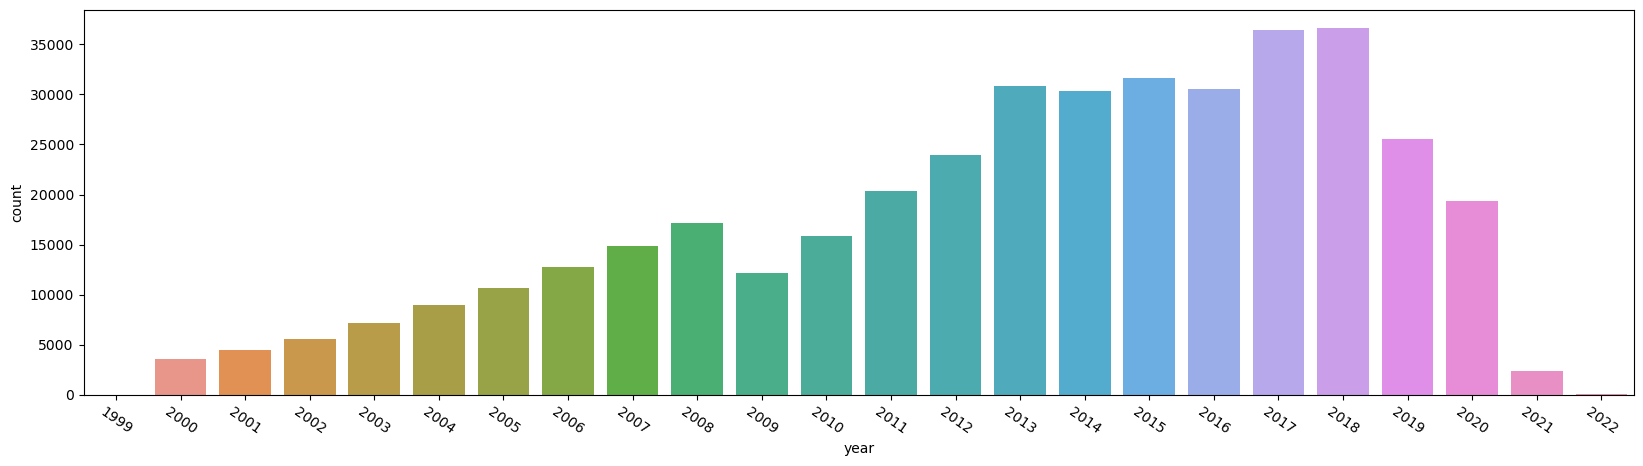

In [10]:
df_year = df[(df["year"]>1999)].copy()
df_year["year"] = df_year["year"].astype(int)
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.countplot(data= df_year,x="year")
plt.show()

## Compare price by year

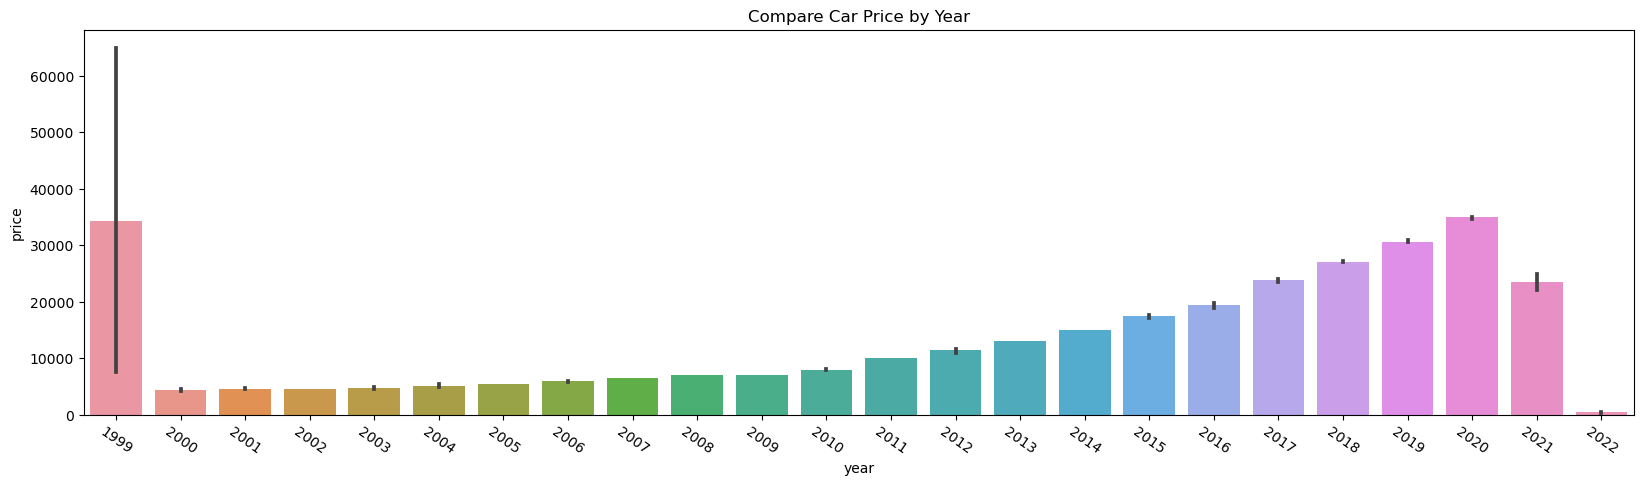

In [11]:
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.barplot(data= df_year,x="year", y= "price",estimator=np.median)
plt.title("Compare Car Price by Year")
plt.show()

## Top Car 10 models

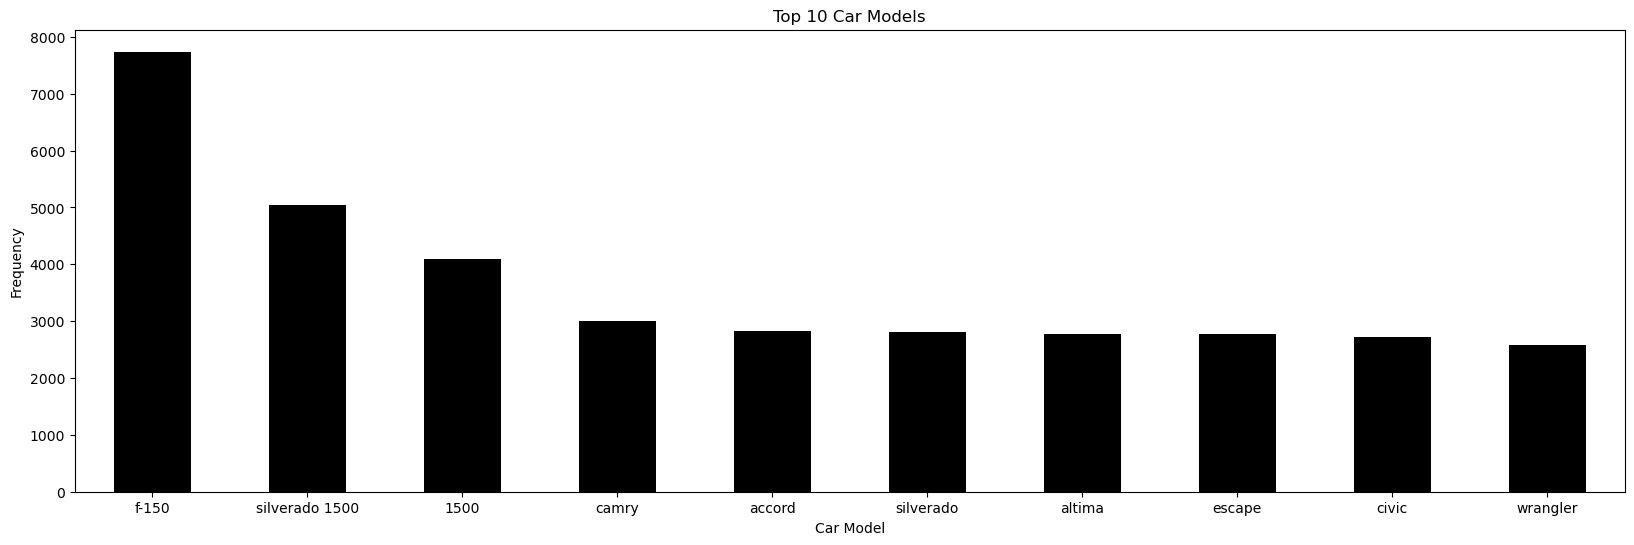

In [12]:
df_year['model'].value_counts().head(10).plot.bar(figsize=(20, 6), rot=0, color='black')
plt.title("Top 10 Car Models")
plt.xlabel("Car Model")
plt.ylabel("Frequency")
plt.show()

## 10 least car model

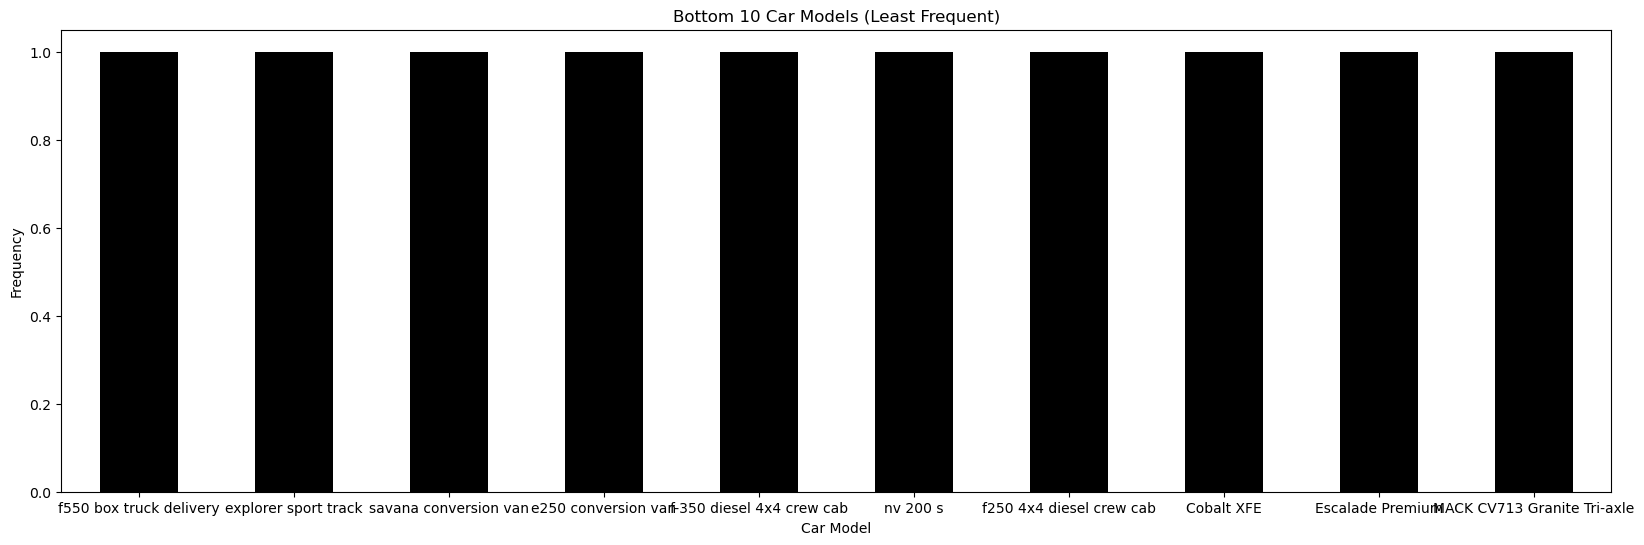

In [13]:
df_year['model'].value_counts().tail(10).plot.bar(figsize=(20, 6), rot=0, color='black')
plt.title("Bottom 10 Car Models (Least Frequent)")
plt.xlabel("Car Model")
plt.ylabel("Frequency")
plt.show()

## Comparison of best car Color

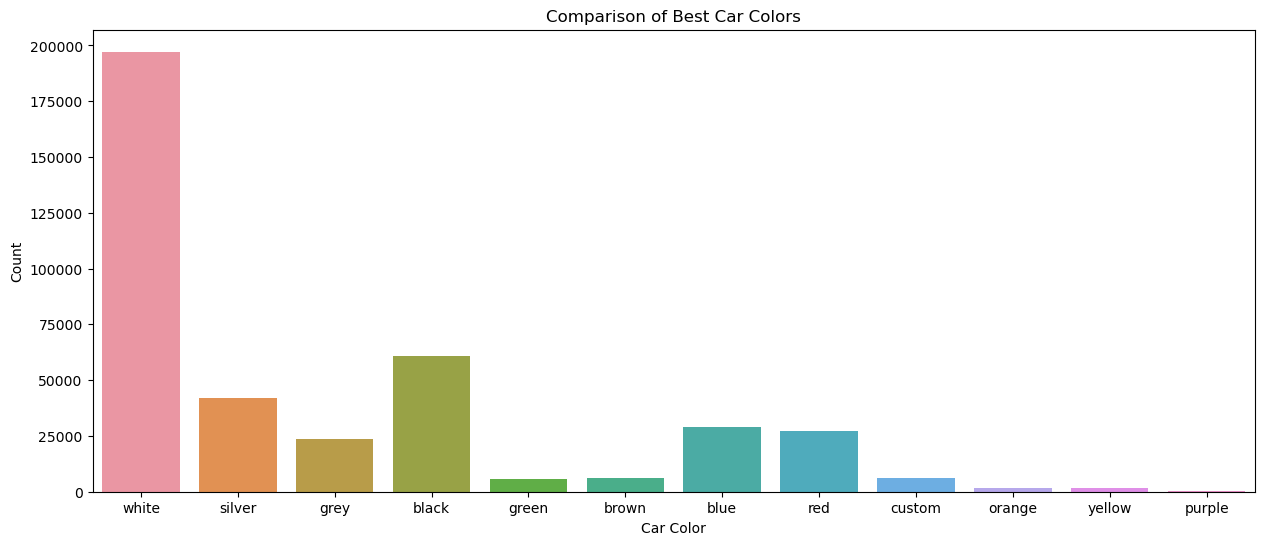

In [14]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_year, x="paint_color")
plt.title("Comparison of Best Car Colors")
plt.xlabel("Car Color")
plt.ylabel("Count")
plt.show()

## Comparing car condition by color

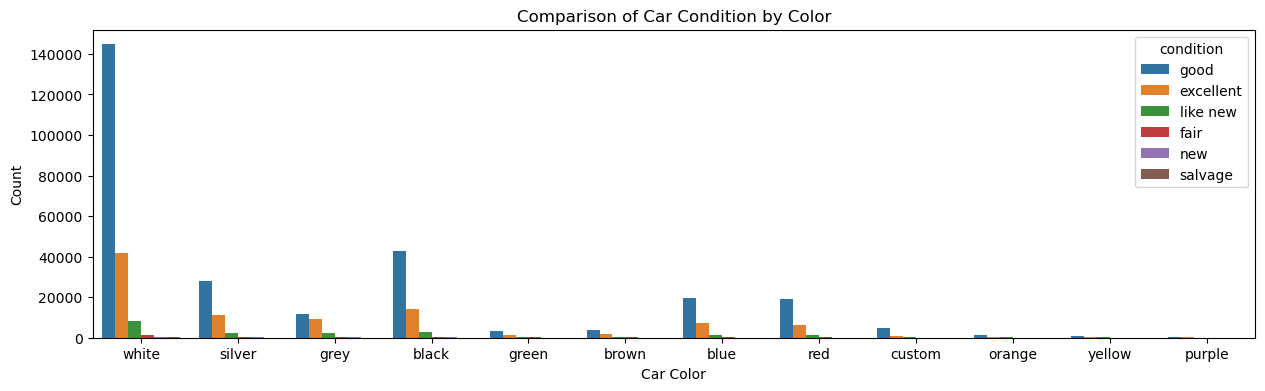

In [15]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_year, x="paint_color", hue="condition")
plt.title("Comparison of Car Condition by Color")
plt.xlabel("Car Color")
plt.ylabel("Count")
plt.show()

## Analysis of Car Type market share

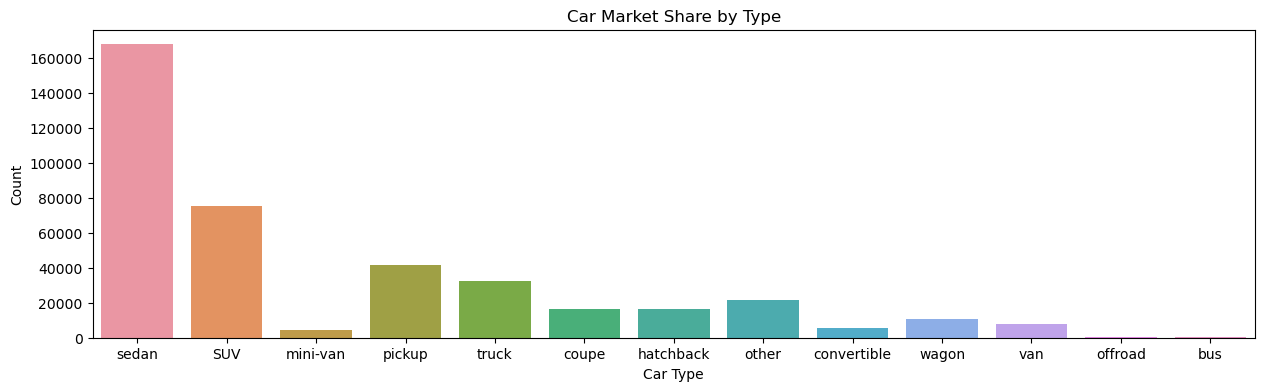

In [16]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df_year, x="type")
plt.title("Car Market Share by Type")
plt.xlabel("Car Type")
plt.ylabel("Count")
plt.show()

## Top  10 car by regions 

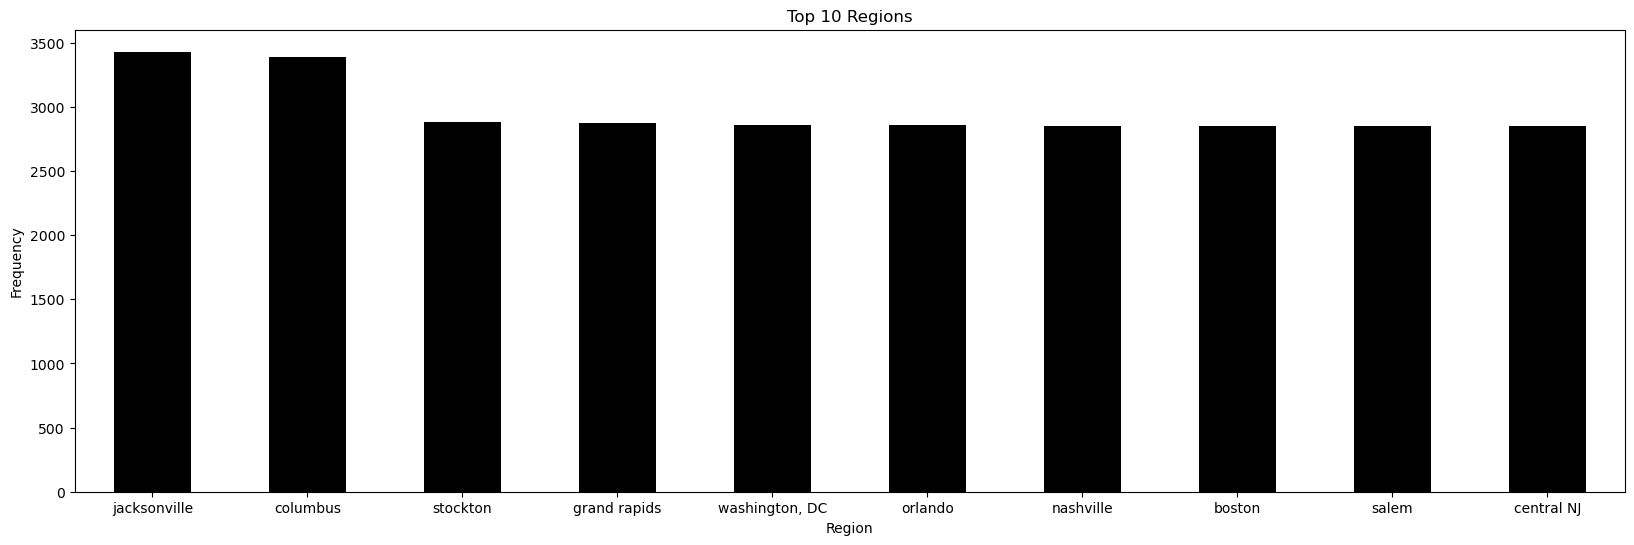

In [17]:
df_year['region'].value_counts().head(10).plot.bar(figsize=(20, 6), rot=0, color='black')
plt.title("Top 10 Regions")
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.show()

## Bottom 10 regions by car count

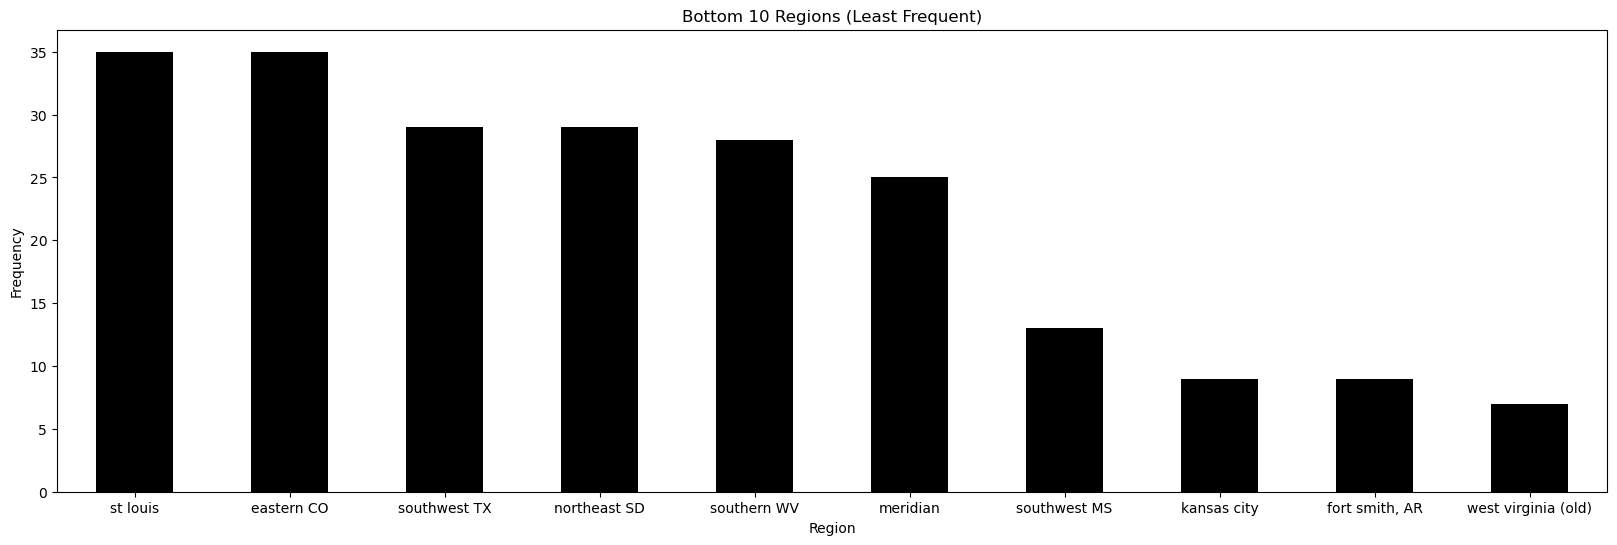

In [18]:
df_year['region'].value_counts().tail(10).plot.bar(figsize=(20, 6), rot=0, color='black')
plt.title("Bottom 10 Regions (Least Frequent)")
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.show()

## Comparing car price by fuel consumption

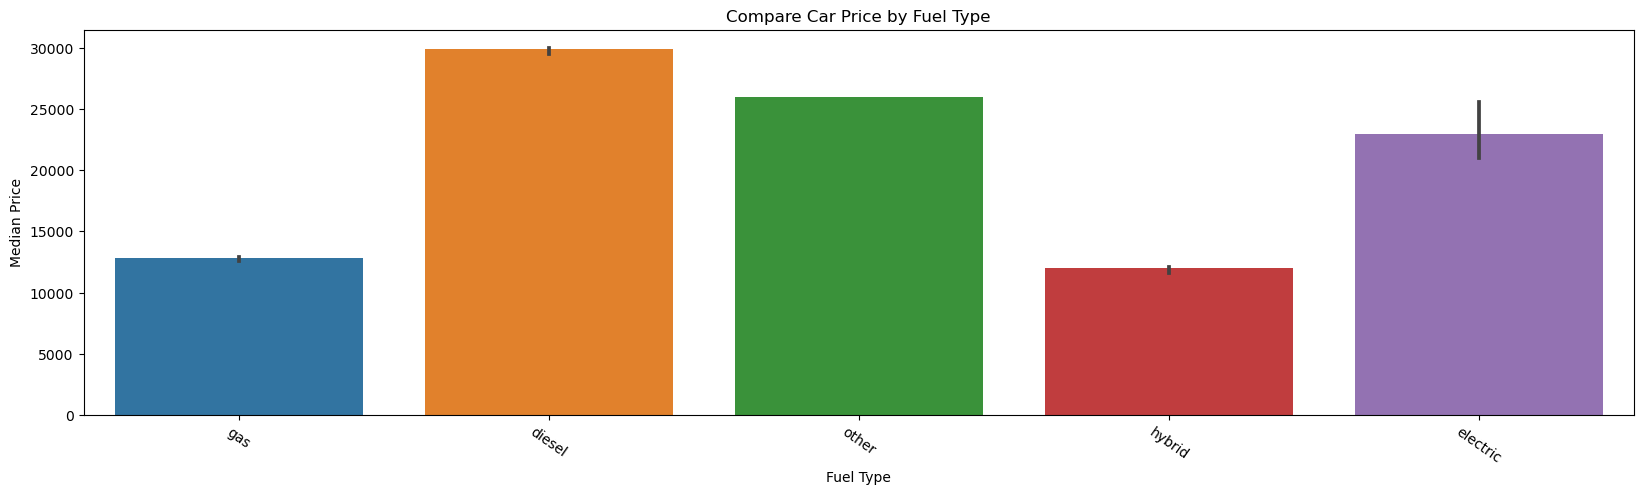

In [19]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=-35)
sns.barplot(data=df_year, x="fuel", y="price", estimator=np.median)
plt.title("Compare Car Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Median Price")
plt.show()

## Comparison of Days to Removal Over Years (2010 and Above)

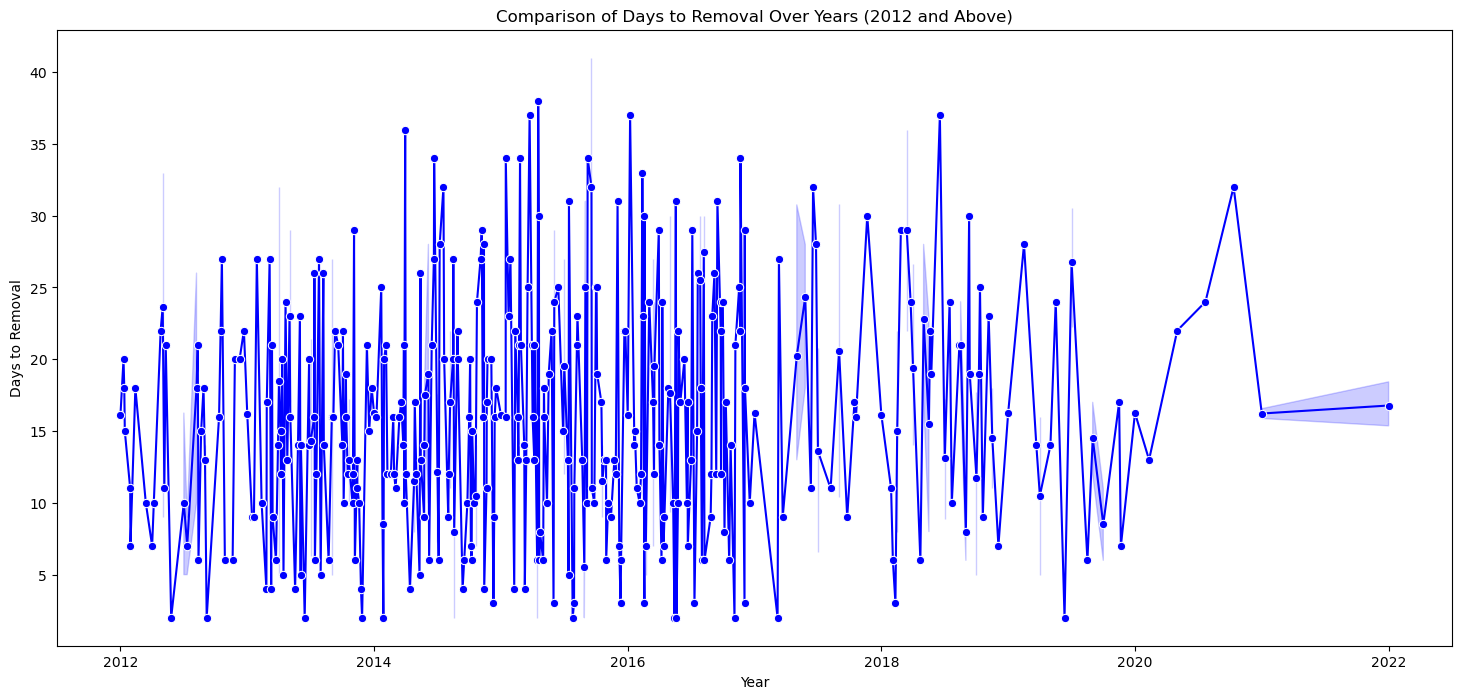

In [20]:
plt.figure(figsize=(18, 8))

# Filter the DataFrame for years 2012 and above
df_filtered = df[df['year'] >= 2012]

sns.lineplot(x='year', y=df_filtered['day_value'].astype(float), data=df_filtered, marker='o', color='b')

plt.title('Comparison of Days to Removal Over Years (2012 and Above)')
plt.xlabel('Year')
plt.ylabel('Days to Removal')
plt.show()

# CONCLUSION AND FINDINGS

**Conclusion:**

**Vehicle Purchase Trend (2000-2022):**
The data analysis reveals a steady increase in the number of vehicle purchases from 2000 to 2019, indicating a growing demand for automobiles. However, an interesting deviation occurred in 2020, likely attributed to the global pandemic. The uncertainties and economic challenges during the pandemic may have influenced consumer behavior, resulting in a temporary decline in vehicle purchases.

**Comparison of Car Prices by Year:**
Examining the trend in car prices over the years reveals a consistent upward trajectory. This can be attributed to several factors, including an improved standard of living, increased inflation, and rising overall costs. As consumers seek more advanced features and technologies in their vehicles, manufacturers adjust prices to reflect these enhancements.

**Top 10 Car Models:**
The analysis identifies F-150 and Silverado 1500 as the two most popular car models, while G37 Journey and Tahoe LT 1500 rank among the least popular. This information can guide manufacturers and dealerships in understanding consumer preferences and adjusting their inventory accordingly.

**Comparison of Car Colors:**
White and black emerge as the most popular car colors, possibly driven by their timeless and versatile appeal. In contrast, purple and orange are among the least preferred colors, reflecting the niche market for these vibrant options.

**Comparing Car Condition by Color:**
An intriguing insight reveals that white cars have the highest number of vehicles in good condition, while purple cars have the fewest. This correlation suggests that the popularity of certain colors might also be linked to the perceived maintenance and resale value of the vehicles.

**Analysis of Car Type Market Share:**
Sedans and SUVs dominate the car market share, reflecting the practicality and versatility desired by middle-class families. This trend aligns with the preferences of consumers seeking reliable and spacious vehicles for family use.

**Top 10 Cars by Regions:**
Jacksonville and Columbus stand out as the most popular regions for car sales, while West Virginia and Kansas City show comparatively lower demand. Understanding regional preferences is crucial for manufacturers and dealerships to tailor their marketing strategies effectively.

**Comparing Car Price by Fuel Consumption:**
The analysis indicates that diesel cars command the highest prices, possibly due to environmental considerations and efforts to discourage traditional fossil fuel usage. Electric cars also exhibit higher prices, reflecting their evolving technology and potential market positioning. As these technologies become more widespread, market dynamics may shift further.

**Comparison of Days to Removal Over Years (2012 and Above):**
The fluctuation in the number of days a car takes to sell from 2010 onwards suggests evolving market conditions. The steady increase observed from 2019 aligns with the onset of the global pandemic, indicating potential challenges faced by buyers and sellers during periods of economic uncertainty and lockdowns.

In summary, this comprehensive analysis provides valuable insights into various facets of the automotive market, shedding light on consumer preferences, market trends, and external factors influencing purchasing behavior. Manufacturers, dealerships, and policymakers can leverage these insights to make informed decisions in a dynamic and evolving automotive landscape.